<a href="https://colab.research.google.com/github/Marlburo/camera_gcolab/blob/main/camera_capt_snippet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


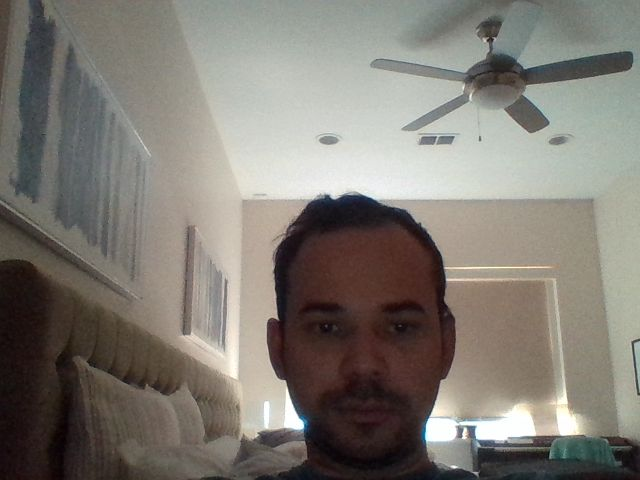

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

In [ ]:
import matplotlib.pyplot as plt


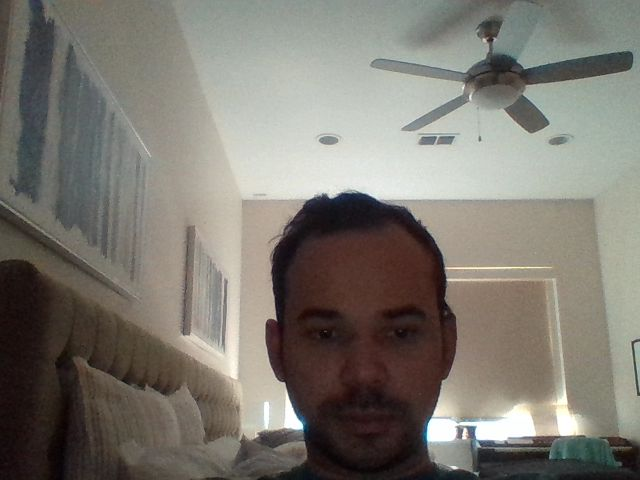

In [ ]:
pict = display(Image(filename))

In [ ]:
pict = cv2.imread('photo.jpg')

In [ ]:
pict.shape

(480, 640, 3)

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

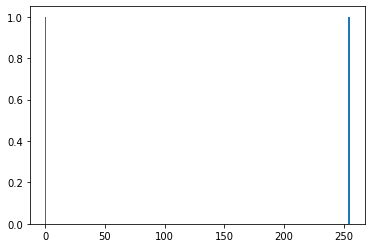

In [ ]:
plt.hist(data=pict, bins=256, x=[0,255])

In [ ]:
gray_pict = cv2.cvtColor(pict, cv2.COLOR_BGR2GRAY)

In [ ]:
gray_pict.shape

(480, 640)

(array([1.000e+00, 2.000e+00, 4.000e+00, 1.700e+01, 3.400e+01, 9.900e+01,
        1.530e+02, 1.870e+02, 2.340e+02, 2.280e+02, 2.790e+02, 3.240e+02,
        3.740e+02, 4.940e+02, 7.100e+02, 9.480e+02, 1.214e+03, 1.550e+03,
        1.778e+03, 1.905e+03, 1.850e+03, 1.624e+03, 1.478e+03, 1.360e+03,
        1.360e+03, 1.530e+03, 1.511e+03, 1.611e+03, 1.518e+03, 1.461e+03,
        1.442e+03, 1.350e+03, 1.215e+03, 1.218e+03, 1.250e+03, 1.229e+03,
        1.201e+03, 1.219e+03, 1.316e+03, 1.351e+03, 1.496e+03, 1.564e+03,
        1.608e+03, 1.433e+03, 1.463e+03, 1.427e+03, 1.503e+03, 1.724e+03,
        1.927e+03, 2.098e+03, 1.964e+03, 1.979e+03, 1.840e+03, 1.596e+03,
        1.570e+03, 1.434e+03, 1.393e+03, 1.390e+03, 1.310e+03, 1.302e+03,
        1.175e+03, 1.080e+03, 9.530e+02, 9.560e+02, 9.440e+02, 9.300e+02,
        9.820e+02, 1.015e+03, 1.031e+03, 1.086e+03, 1.005e+03, 9.810e+02,
        9.090e+02, 8.530e+02, 7.760e+02, 7.810e+02, 7.520e+02, 7.850e+02,
        7.550e+02, 8.020e+02, 8.000e+0

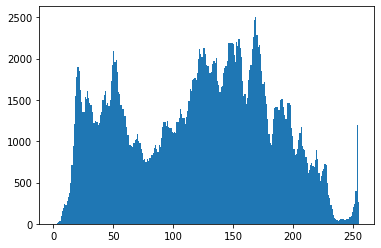

In [ ]:
plt.hist(gray_pict.ravel(), bins=255)

(array([1.000e+00, 2.000e+00, 4.000e+00, 1.700e+01, 3.400e+01, 9.900e+01,
        1.530e+02, 1.870e+02, 2.340e+02, 2.280e+02, 2.790e+02, 3.240e+02,
        3.740e+02, 4.940e+02, 7.100e+02, 9.480e+02, 1.214e+03, 1.550e+03,
        1.778e+03, 1.905e+03, 1.850e+03, 1.624e+03, 1.478e+03, 1.360e+03,
        1.360e+03, 1.530e+03, 1.511e+03, 1.611e+03, 1.518e+03, 1.461e+03,
        1.442e+03, 1.350e+03, 1.215e+03, 1.218e+03, 1.250e+03, 1.229e+03,
        1.201e+03, 1.219e+03, 1.316e+03, 1.351e+03, 1.496e+03, 1.564e+03,
        1.608e+03, 1.433e+03, 1.463e+03, 1.427e+03, 1.503e+03, 1.724e+03,
        1.927e+03, 2.098e+03, 1.964e+03, 1.979e+03, 1.840e+03, 1.596e+03,
        1.570e+03, 1.434e+03, 1.393e+03, 1.390e+03, 1.310e+03, 1.302e+03,
        1.175e+03, 1.080e+03, 9.530e+02, 9.560e+02, 9.440e+02, 9.300e+02,
        9.820e+02, 1.015e+03, 1.031e+03, 1.086e+03, 1.005e+03, 9.810e+02,
        9.090e+02, 8.530e+02, 7.760e+02, 7.810e+02, 7.520e+02, 7.850e+02,
        7.550e+02, 8.020e+02, 8.000e+0

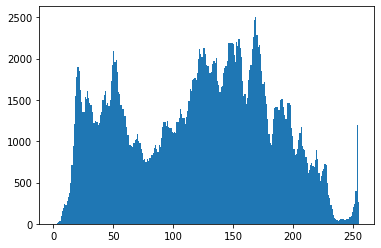

In [ ]:
plt.hist(gray_pict.ravel(), bins=255)

In [ ]:
g_p = cv2.cvtColor(pict, cv2.COLOR_BGRA2GRAY)

In [ ]:
g_p.shape

(480, 640)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([  1.       ,   1.9921875,   2.984375 ,   3.9765625,   4.96875  ,
          5.9609375,   6.953125 ,   7.9453125,   8.9375   ,   9.9296875,
         10.921875 ,  11.9140625,  12.90625  ,  13.8984375,  14.890625 ,
         15.8828125,  16.875    ,  17.8671875,  18.859375 ,  19.8515625,
         20.84375  ,  21.8359375,  22.828125 ,  23.8203125,  24.8125   ,
         25.8046875,  26.796875 ,  27.7890625,  28.78125  ,  29.7734375,
         30.765625 ,  31.7578125,  32.75     ,  33.7421875,  34.734375 ,
         35.7265625,  36.71875  ,  37.7109375,  38.703125 ,  39.6953125,
         40.6875   ,  41.6796875,  42.671875 ,  43.6640625,  44.65625  ,
         45.6484375,  46.640625 ,  47.6328125,  48.625    ,  49.6171875,
         50.609375 , 

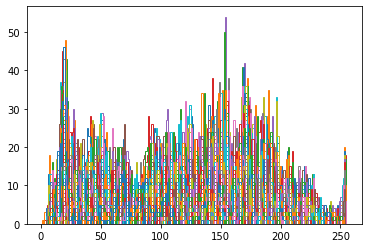

In [ ]:
plt.hist(g_p.ravel(), bins=256, histtype='step')

In [ ]:
display(Image(g_p))

/usr/local/lib/python3.7/dist-packages/IPython/core/formatters.py:364: FormatterWarning: image/png formatter returned invalid type <class 'numpy.ndarray'> (expected (<class 'bytes'>, <class 'str'>)) for object: <IPython.core.display.Image object>
  FormatterWarning


<IPython.core.display.Image object>

In [ ]:
from google.colab.patches import cv2_imshow

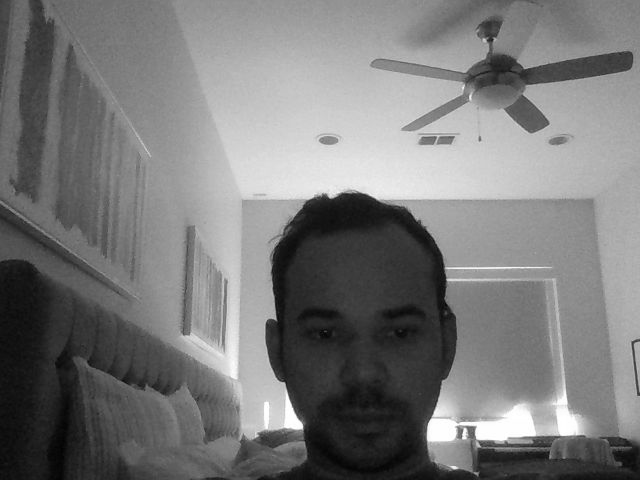

In [ ]:
cv2_imshow(g_p)

In [ ]:
g_p[0, 255]

147

In [ ]:
from PIL import Image
from matplotlib import image as mpimg

In [ ]:
img = mpimg.imread('photo.jpg')

In [ ]:
img

array([[[ 66,  61,  55],
        [ 67,  62,  56],
        [ 70,  65,  59],
        ...,
        [122, 129, 122],
        [122, 129, 122],
        [122, 129, 122]],

       [[ 65,  60,  54],
        [ 67,  62,  56],
        [ 69,  64,  58],
        ...,
        [123, 130, 123],
        [122, 129, 122],
        [123, 130, 123]],

       [[ 66,  61,  55],
        [ 67,  62,  56],
        [ 69,  64,  58],
        ...,
        [124, 131, 124],
        [124, 131, 124],
        [123, 130, 123]],

       ...,

       [[ 21,  12,  13],
        [ 24,  15,  16],
        [ 23,  14,  15],
        ...,
        [ 30,  26,  27],
        [ 29,  25,  26],
        [ 28,  24,  25]],

       [[ 22,  13,  14],
        [ 24,  15,  16],
        [ 23,  14,  15],
        ...,
        [ 26,  22,  23],
        [ 26,  22,  23],
        [ 25,  21,  22]],

       [[ 25,  16,  17],
        [ 26,  17,  18],
        [ 23,  14,  15],
        ...,
        [ 23,  19,  20],
        [ 23,  19,  20],
        [ 23,  19,  20]]

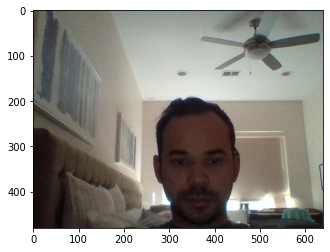

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(480, 640, 3)

In [ ]:
#convert jpg 2 png
#img[:, :, 0]
img = Image.open('photo.jpg').convert('RGB')
img.save('photo.png', 'png')


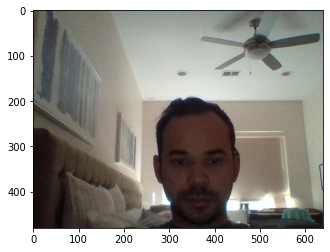

In [ ]:
plt.imshow(img)

In [ ]:
img_png = mpimg.imread('photo.png')

In [ ]:
img_png

array([[[0.25882354, 0.23921569, 0.21568628],
        [0.2627451 , 0.24313726, 0.21960784],
        [0.27450982, 0.25490198, 0.23137255],
        ...,
        [0.47843137, 0.5058824 , 0.47843137],
        [0.47843137, 0.5058824 , 0.47843137],
        [0.47843137, 0.5058824 , 0.47843137]],

       [[0.25490198, 0.23529412, 0.21176471],
        [0.2627451 , 0.24313726, 0.21960784],
        [0.27058825, 0.2509804 , 0.22745098],
        ...,
        [0.48235294, 0.50980395, 0.48235294],
        [0.47843137, 0.5058824 , 0.47843137],
        [0.48235294, 0.50980395, 0.48235294]],

       [[0.25882354, 0.23921569, 0.21568628],
        [0.2627451 , 0.24313726, 0.21960784],
        [0.27058825, 0.2509804 , 0.22745098],
        ...,
        [0.4862745 , 0.5137255 , 0.4862745 ],
        [0.4862745 , 0.5137255 , 0.4862745 ],
        [0.48235294, 0.50980395, 0.48235294]],

       ...,

       [[0.08235294, 0.04705882, 0.05098039],
        [0.09411765, 0.05882353, 0.0627451 ],
        [0.09019608, 0

In [ ]:
#plt.hist(img_png)
img_png.shape

(480, 640, 3)

In [ ]:
sli_img = img_png[:, :, 0]

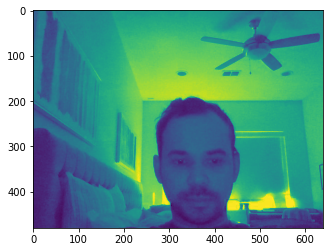

In [ ]:
plt.imshow(sli_img)

In [ ]:
plt.hist(sli_img, bins= 255)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568628,
        0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
        0.03921569, 0.04313726, 0.04705882, 0.05098039, 0.05490196,
        0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.07450981,
        0.07843138, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
        0.09803922, 0.10196079, 0.10588235, 0.10980392, 0.11372549,
        0.11764706, 0.12156863, 0.1254902 , 0.12941177, 0.13333334,
        0.13725491, 0.14117648, 0.14509805, 0.14901961, 0.15294118,
        0.15686275, 0.16078432, 0.16470589, 0.16862746, 0.17254902,
        0.1764706 , 0.18039216, 0.18431373, 0.1882353 , 0.19215687,
        0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
   

In [ ]:
plt.hist(sli_img, histtype='step', bins=200)

In [ ]:
img_plot = plt.imshow(sli_img, clim=(0.3, 0.7))

In [ ]:
sli_img = sli_img.save('nphoto.png').convert('RGB')

In [ ]:
img_plot = plt.imshow(sli_img)